In [36]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from tensorflow.keras.optimizers import Adam
import pickle


In [37]:
encoder = OneHotEncoder()
encoder.fit([[0], [1],[2]]) 

# 0 - malignnant cancer 
# 1 - bengin stage 
# 2 - normal ( no cancer)

OneHotEncoder()

In [38]:
data = []
result = []

# Folder paths
base_path = r'../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/'

folders = {
    "Malignant cases": 0,
    "Bengin cases": 1,
    "Normal cases": 2
}

for folder, label in folders.items():
    folder_path = os.path.join(base_path, folder)
    print("Loading:", folder_path)

    for r, d, f in os.walk(folder_path):
        for file in f:
            if '.jpg' in file:
                img_path = os.path.join(r, file)

                img = Image.open(img_path).resize((128,128))
                img = np.array(img)

                if img.shape == (128,128,3):
                    data.append(img)
                    result.append(encoder.transform([[label]]).toarray())


Loading: ../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases
Loading: ../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading: ../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases


In [39]:
data = np.array(data)
result = np.vstack(result)

In [40]:
print("Data shape:", data.shape)
print("Result shape:", result.shape)


Data shape: (1097, 128, 128, 3)
Result shape: (1097, 3)


In [42]:
result = np.array(result)
result = result.reshape(1097,3)

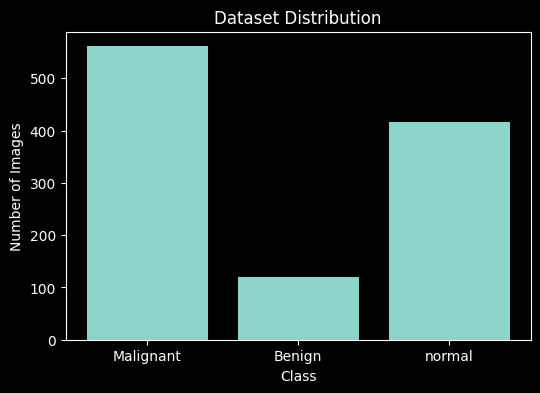

{'Malignant': 561.0, 'Benign': 120.0, 'normal': 416.0}


In [43]:
lass_names = ["Malignant", "Benign", "Normal"]

counts = np.sum(result, axis=0)

plt.figure(figsize=(6,4))
plt.bar(class_names, counts)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution")
plt.show()

print(dict(zip(class_names, counts)))


In [48]:
X_train,X_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [49]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# IMPORTANT: you have **3 classes**
model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/15


I0000 00:00:1763211847.433254     143 service.cc:148] XLA service 0x7ee5a8005e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763211847.434834     143 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763211847.434856     143 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763211847.839431     143 cuda_dnn.cc:529] Loaded cuDNN version 90300


 9/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4300 - loss: 81.9739

I0000 00:00:1763211852.220592     143 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.5183 - loss: 47.7270 - val_accuracy: 0.5114 - val_loss: 1.3322
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8115 - loss: 0.4811 - val_accuracy: 0.8864 - val_loss: 0.2949
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9252 - loss: 0.2057 - val_accuracy: 0.9432 - val_loss: 0.1223
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9726 - loss: 0.0934 - val_accuracy: 0.9432 - val_loss: 0.0901
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9893 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9942 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9922 - loss: 0.0214 - val_accuracy: 0.9886 - val_loss:

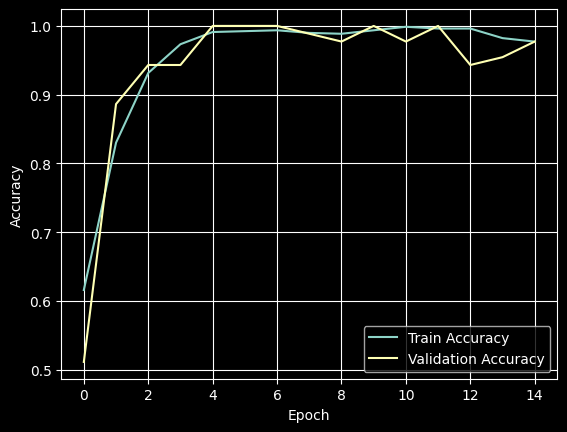

In [55]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


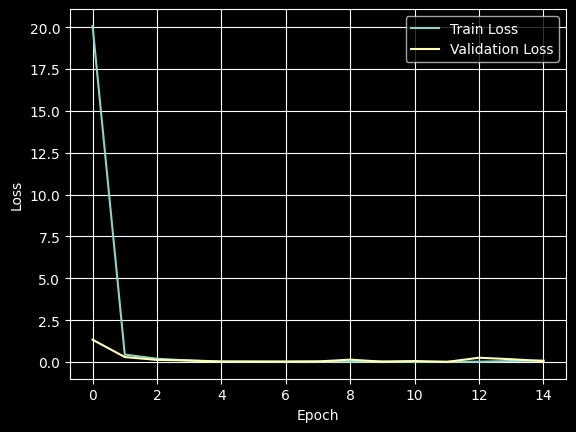

In [63]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [62]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


train_acc = history.history["accuracy"][-1] * 100
val_acc   = history.history["val_accuracy"][-1] * 100

print(f"\nTrain Accuracy: {train_acc:.2f}%")
print(f"Validation Accuracy: {val_acc:.2f}%")

diff = train_acc - val_acc
print(f"\nAccuracy Difference: {diff:.2f}%")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

📌 Classification Report:

              precision    recall  f1-score   support

   Malignant       1.00      1.00      1.00        94
      Benign       0.88      0.92      0.90        25
      normal       0.98      0.97      0.98       101

    accuracy                           0.98       220
   macro avg       0.95      0.96      0.96       220
weighted avg       0.98      0.98      0.98       220


Train Accuracy: 97.72%
Validation Accuracy: 97.73%

Accuracy Difference: -0.01%


In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusuin matrixt:")
print(f"Malignant → {cm[0]}")
print(f"Benign    → {cm[1]}")
print(f"Normal    → {cm[2]}")



Confusuin matrixt:
Malignant → [94  0  0]
Benign    → [ 0 23  2]
Normal    → [ 0  3 98]


In [69]:
# Path to your folder containing ONLY test images
test_folder = "/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases"   # change this

# Run predictions
print("\n----- PREDICTIONS ON TEST IMAGES -----\n")

for file in os.listdir(test_folder):
    if file.lower().endswith((".jpg", ".png", ".jpeg")):

        img_path = os.path.join(test_folder, file)

        # Load + preprocess image
        img = Image.open(img_path).resize((128,128))
        img = np.array(img).reshape(1,128,128,3)

        # Predict
        pred = model.predict(img)
        pred_class = np.argmax(pred)
        confidence = pred[0][pred_class] * 100

        # Class names
        class_names = ["Malignant", "Benign", "Normal"]

        print(f"{file} → {class_names[pred_class]} ({confidence:.2f}%)")



----- PREDICTIONS ON TEST IMAGES -----

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
000328_08_03_180.png → Normal (65.62%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
000223_09_02_146.png → Malignant (98.40%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
000229_03_04_202.png → Malignant (54.37%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
000103_01_01_104.png → Normal (47.60%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
000103_12_01_075.png → Malignant (86.38%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
000143_04_02_153.png → Malignant (86.26%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
002276_05_03_078.png → Normal (91.02%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
000020_03_01_166.png → Malignant (98.26%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
000054_03_01_025.png → Malignant (100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
000230_04_01_242.png → Malignant (98.65%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
000058_07_01_170.png → Malignant (91.42%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
000058_07_01_195.png → Malignant (97.03%)
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


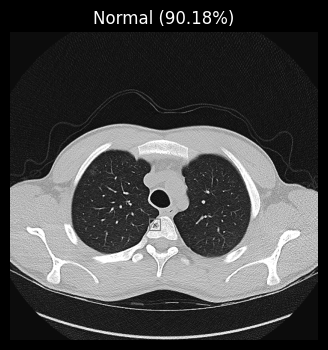

000020_02_01_062.png → Normal | Confidence: 90.18%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


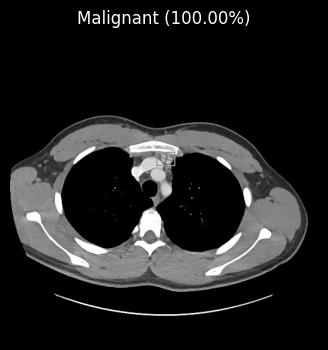

000021_04_01_090.png → Malignant | Confidence: 100.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


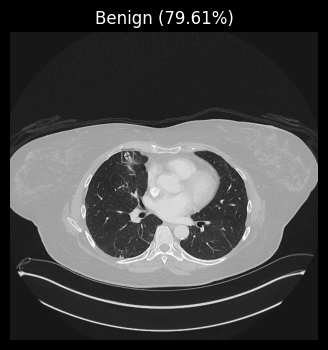

000138_01_01_148.png → Benign | Confidence: 79.61%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


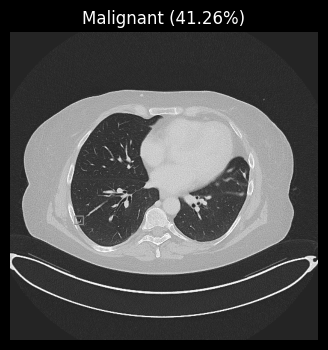

000228_03_03_165.png → Malignant | Confidence: 41.26%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


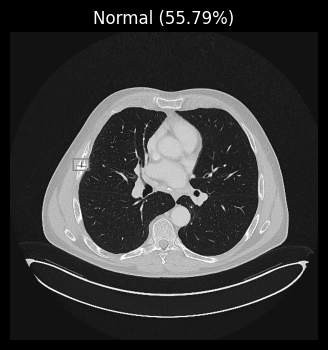

000328_08_03_167.png → Normal | Confidence: 55.79%



In [76]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

test_folder = "/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases"  

class_names = ["Malignant", "Benign", "Normal"]
files = [f for f in os.listdir(test_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
random_files = random.sample(files, 5)

for file in random_files:

    img_path = os.path.join(test_folder, file)
    img = Image.open(img_path)
    disp_img = img.convert("L")
    proc_img = img.convert("RGB").resize((128, 128))
    img_array = np.array(proc_img).reshape(1, 128, 128, 3)
    pred = model.predict(img_array)
    pred_class = np.argmax(pred)
    confidence = pred[0][pred_class] * 100

    plt.figure(figsize=(4, 4))
    plt.imshow(disp_img, cmap="gray")
    plt.axis("off")
    plt.title(f"{class_names[pred_class]} ({confidence:.2f}%)")
    plt.show()

    print(f"{file} → {class_names[pred_class]} | Confidence: {confidence:.2f}%\n")


In [66]:
model.save("lung_cancer_model.h5")
